Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что стоп-слова были исключены при векторизации!
* К сожалению, в работе допущено несколько ошибок. Надеюсь, исправления не займут много времени.
* Также я оставил несколько советов. Обрати на них внимание.
* Жду новую версию проекта.

Артем, привет! На "ты" очень даже отлично :) 
Спасибо за такую оперативную проверку, комментарии и советы) Постарался все учесть и подправить. 

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений работа значительно улучшился.
* Радует, что советы также были учтены.
* К сожалению в последнем шаге допущена ошибка. Почему модель обучается и тестируется на одной и той же выборке? Разве такое имеет смысл?
* Отправляй новую версию как только будут готовы изменения.

##### Артем, ты прав) ошибку исправил.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Вот теперь все корректно, молодец!
* Работа получилась отличной, тебе удалось добиться достаточно хорошего качества. Поздравляю!
* Проект зачтен, удачи в дальнейшем обучении!

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

### Инструкция по выполнению проекта

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

### Описание данных

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

# 1. Подготовка

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as nltk_stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer 
import string
from sklearn.svm import LinearSVC
from nltk import word_tokenize, pos_tag
import re
from itertools import product
import warnings
from joblib import dump, load
from nltk.tokenize import sent_tokenize
from sklearn.linear_model import RidgeClassifier
import gc
from tqdm import tqdm, tqdm_notebook, notebook
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
warnings.filterwarnings('ignore')

rnd_state = 12345
data = pd.read_csv('/datasets/toxic_comments.csv')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

- готово

#### Ознакомимся с данными

In [2]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [3]:
data.sample(10, random_state=rnd_state)

,text,toxic
146790,Ahh shut the fuck up you douchebag sand nigger...,1
2941,"""\n\nREPLY: There is no such thing as Texas Co...",0
115087,"Reply\nHey, you could at least mention Jasenov...",0
48830,"Thats fine, there is no deadline ) chi?",0
136034,"""\n\nDYK nomination of Mustarabim\n Hello! You...",0
121992,"""\n\nSockpuppetry case\n \nYou have been accus...",0
37282,"Judging by what I've just read in an article, ...",0
64488,Todd and Copper\nIn the first film they were l...,0
16992,"""\n\n \nYou have been blocked from editing for...",0
138230,| decline=Can't find evidence of block either ...,0


In [4]:
data.shape

(159571, 2)

In [5]:
data.isnull().sum()

text     0
toxic    0
dtype: int64

<div class="alert alert-block alert-info">
<b>Совет: </b> Загрузка данных проведена хорошо. Не забывай проверять загруженные файлы на пропуски.
</div>

- готово

In [6]:
max_len = data['text'].str.len().max()
max_len

5000

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было даже построить гистограмму распределния длины.
</div>

Посмотрим на баланс классов:

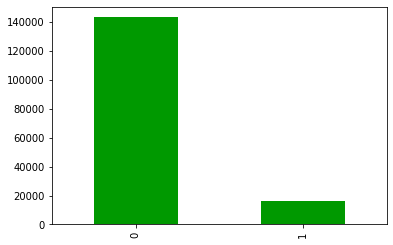

In [7]:
data['toxic'].value_counts().plot(kind='bar', color='#009900')

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты визуализировал баланс классов.
</div>

Процентное соотношение токсичных комментариев: 

In [8]:
toxic_ratio = pd.Series(data['toxic']==1).sum()/data.shape[0]
print('toxic ratio: {:.2%}'.format(toxic_ratio))

toxic ratio: 10.17%


Наблюдаем дисбаланс классов, токсичных комментариев намного меньше. Учтем его в дальнейшей обработке. 

Для дальнейшей работы необходимо лемматизировать текст:

- определим слова токенов, стоп-слова
- уберем знаки припенания
- уберем стоп-слова
- добавим фильтр для знаков припенания

In [9]:
stop_words = set(nltk_stopwords.words('english'))
punctuation = string.punctuation 
wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
def tokenizer(text):
    tokens = [ word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    tokens = list(filter(lambda t: t not in punctuation, tokens)) 
    tokens = list(filter(lambda t: t.lower() not in stop_words, tokens))
    filtered_tokens = []
    for token in tokens: # Регулярные выражений
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens = list(
        map(lambda token: wordnet_lemmatizer.lemmatize(token.lower()), filtered_tokens))
    filtered_tokens = list(filter(lambda t: t not in punctuation, filtered_tokens))
    return ' '.join(filtered_tokens)

In [11]:
%%time
data['text_clean'] = data['text'].map(tokenizer)

CPU times: user 4min 13s, sys: 643 ms, total: 4min 13s
Wall time: 4min 16s


In [12]:
data.shape

(159571, 3)

<div class="alert alert-block alert-success">
<b>Успех:</b> Лемматизация и очистка текста сделаны отлично.
</div>

Создадим функцию, которая разделит датасет на : обущающий, валидацилный и тестовый

In [13]:
def split_train_test_valid(dataframe, test_size, valid_size):
    
    data_train, data_test = train_test_split(
        dataframe,
        test_size=test_size,
        shuffle = False,
        
    )
    
    post_split_valid_size = valid_size / (1 - test_size)
    data_train, data_valid = train_test_split(
        data_train,
        test_size=post_split_valid_size,
        shuffle =False ,
        
    )
    return data_train, data_test, data_valid

In [14]:
data_train, data_test, data_valid = split_train_test_valid(data, 0.1, 0.2)

print(data_train.shape, data_test.shape, data_valid.shape)

(111698, 3) (15958, 3) (31915, 3)


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что были напечатаны размеры полученных наборов.
</div>

In [15]:
data.head(15)

,text,toxic,text_clean
0,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,d'aww match background colour 'm seemingly stu...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man 'm really trying edit war 's guy const...
3,"""\nMore\nI can't make any real suggestions on ...",0,ca n't make real suggestion improvement wonder...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page 's
5,"""\n\nCongratulations from me as well, use the ...",0,congratulation well use tool well talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker piss around work
7,Your vandalism to the Matt Shirvington article...,0,vandalism matt shirvington article reverted pl...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry word 'nonsense offensive anyway 'm inten...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


### Выводы: 

- Наблюдается дисбаланс классов, токсичных комментариев примерно 10% от всех 
- Был использован map
- Текст очистили и лемматизировали

# 2. Обучение

Разбиваем датасет на обучающую, тестовую и валидационную выборки. Для тестовой выборки нам необходимо 10% от исходных данных. Разделяем данные на обычные и целевые признаки.

Определение TF-IDF для обучения моделей как признаки

In [16]:
train_corpus = data_train['text_clean'].values.astype('U')
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

tfidf_train = count_tf_idf.fit_transform(train_corpus)

In [17]:
# Определение таргета для обучения моделей
target_train = data_train['toxic']

In [18]:
valid_target = data_valid['toxic']
valid_corpus = data_valid['text_clean'].values.astype('U')
tfidf_valid = count_tf_idf.transform(valid_corpus)

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что векторизатор был обучен только на тренировочной части. Это поможет уменьшить переобечение модели.
</div>

#### Рассмотрим 3 модели классификации и выберем наиболее подходящую для нашей задачи.

#### Модель Логистическая регрессия

In [19]:
%%time

f1_logic = dict()
for i in product([{'penalty':'l1'},{'penalty':'l2'}],
              [{'max_iter':2},{ 'max_iter':5}, {'max_iter':100}]
              ):
    model_logic = LogisticRegression(random_state = rnd_state,**i[0],**i[1])
    model_logic.fit(tfidf_train, target_train)
    predicted_logic = model_logic.predict(tfidf_valid)
    f1_logic = f1_score(valid_target, predicted_logic)
    print('i=', i, 'f1_logic', f1_logic)

i= ({'penalty': 'l1'}, {'max_iter': 2}) f1_logic 0.7423501720079667
i= ({'penalty': 'l1'}, {'max_iter': 5}) f1_logic 0.7653880463871544
i= ({'penalty': 'l1'}, {'max_iter': 100}) f1_logic 0.7647583377920456
i= ({'penalty': 'l2'}, {'max_iter': 2}) f1_logic 0.0
i= ({'penalty': 'l2'}, {'max_iter': 5}) f1_logic 0.58335144533797
i= ({'penalty': 'l2'}, {'max_iter': 100}) f1_logic 0.7266475644699141
CPU times: user 9.94 s, sys: 5.14 s, total: 15.1 s
Wall time: 15.1 s


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Параметры не изменяются.
</div>

- готово

#### Модель LinearSVC

In [20]:
%%time

f1_svc = dict()
for i in product([{'C':0.1},{'C':1.0} ,{'C':2.5}],
              [{'max_iter':5},{ 'max_iter':10}, {'max_iter':100}]
              ):
    model_svc = LinearSVC(random_state = rnd_state,**i[0],**i[1])
    model_svc.fit(tfidf_train, target_train)
    predicted_svc = model_svc.predict(tfidf_valid)
    f1_svc = f1_score(valid_target, predicted_svc)
    print('i=', i, 'f1_svc', f1_svc)

i= ({'C': 0.1}, {'max_iter': 5}) f1_svc 0.7313632030505244
i= ({'C': 0.1}, {'max_iter': 10}) f1_svc 0.7323675181090356
i= ({'C': 0.1}, {'max_iter': 100}) f1_svc 0.7323675181090356
i= ({'C': 1.0}, {'max_iter': 5}) f1_svc 0.7682166399429895
i= ({'C': 1.0}, {'max_iter': 10}) f1_svc 0.7735288982015016
i= ({'C': 1.0}, {'max_iter': 100}) f1_svc 0.7747559274755927
i= ({'C': 2.5}, {'max_iter': 5}) f1_svc 0.7615645651009109
i= ({'C': 2.5}, {'max_iter': 10}) f1_svc 0.7709516434348648
i= ({'C': 2.5}, {'max_iter': 100}) f1_svc 0.7682074023537439
CPU times: user 5.7 s, sys: 3.73 ms, total: 5.7 s
Wall time: 5.86 s


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Аналогично, подбор параметров не производится.
</div>

- готово

#### Модель RidgeClassifier

In [21]:
%%time

model_clf = RidgeClassifier(alpha = 1, normalize = True)
model_clf.fit(tfidf_train, target_train)
predicted_clf = model_clf.predict(tfidf_valid)
f1_clf = f1_score(valid_target, predicted_clf)
f1_clf

CPU times: user 18.2 s, sys: 19.3 ms, total: 18.2 s
Wall time: 18.3 s


0.761821620835152

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты попробовал несколько моделей!
</div>

### Выводы: 

Исходя из анализа: можно сделать вывод, что модель "LinearSVC" с параметрами i= ({'C': 1.0}, {'max_iter': 100}) f1_svc 0.7747559274755927 наиболее подходящая. Далее проведем тестирование, чтобы подтвердить наше предположение.

# 3. Выводы

In [22]:
test_target = data_test['toxic'] 
test_corpus = data_test['text_clean'].values.astype('U') 

tfidf_test = count_tf_idf.transform(test_corpus) 

best_model = LinearSVC(random_state = rnd_state,  max_iter= 100) 

best_model.fit(tfidf_train, target_train)
predicted_test = best_model.predict(tfidf_test) 
f1 = f1_score(test_target, predicted_test) 
f1

0.7743257084329122

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> В этой части нет вывода.
</div>

- готово

Удалось достичь нужной выличены f1 меры на тестовой выборке при помощи модели LinearSVC с параметром max_iter = 100.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, не забывай про общий вывод.
</div>

- готово

### Выводы: 

- переработан массив текстовых данных
- определили слова токенов, стоп-слова
- уберем знаки припенания
- уберали стоп-слова
- добавили фильтр для знаков припенания
- изучили три модели классификации: Логистическая регрессия, LinearSVC, RidgeClassifier
- наилучшей моделью оказалась LinearSVC, при ней F1 равна 0.77

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны